In [22]:
import sys
sys.path.append('/home/ubuntu/workspace/einops')

In [23]:
# import utils

In [24]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [25]:
ims = numpy.load('../resources/test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


In [26]:
ims[5].shape

(96, 96, 3)

In [27]:
from einops import rearrange, reduce, repeat

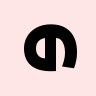

In [28]:
rearrange(ims[0], 'h w c -> w h c')

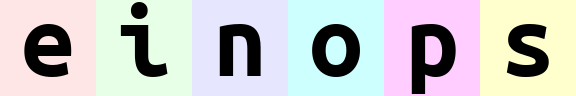

In [29]:
rearrange(ims, 'b h w c ->  h (b w) c')

In [30]:
rearrange(ims, 'b h w c ->  h (b w) c').shape

(96, 576, 3)

In [31]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c', b2=3).shape

(2, 3, 96, 96, 3)

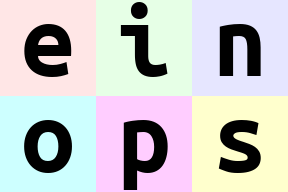

In [32]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

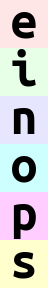

In [33]:
reduce(ims, 'b (h h2) (w w2) c -> (b h) w c', 'mean', h2=2, w2=2)

In [34]:
# mat = numpy.asarray([[1,2,3],
#        [4,5,6],
#        [7,8,9],
#        [10,11,12]])
import numpy
mat = numpy.arange(36).reshape(4, 3, 3)
# mat.shape
mat

In [35]:
rearrange(mat, 'a b c-> b a c')

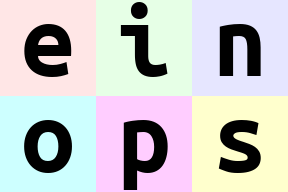

In [36]:
reduce(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', 'min', b1=2)

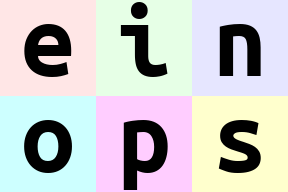

In [37]:
reduce(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', 'min', b1=2)

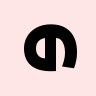

In [38]:
rearrange(ims[0], 'h w c -> (w) h c')

In [51]:
import numpy as np

# Initialize a small 4D array to simulate the tensor
# Shape: (batch, height, width, channels) = (2, 2, 2, 3)
A = np.arange(2*2*2*3).reshape((2, 2, 2, 3))

# Print the original array for reference
print("Original Array A:")
print(A)

# Output array shape based on the pattern 'b h w c -> h (w b) c'
B = np.empty((2, 2*2, 3), dtype=A.dtype)  # Simplified output shape: (h, w*b, c)

# Loop through each dimension, interleave w and b, and print values
print("\nProcessing and Interleaving:")
for hi in range(2):  # height
    for wi in range(2):  # width
        for bi in range(2):  # batch
            target_w = wi * 2 + bi  # Calculate the new width position
            B[hi, target_w, :] = A[bi, hi, wi, :]  # Interleave and assign
            
            # Print the variables and actions
            print(f"hi: {hi}, wi: {wi}, bi: {bi}, target_w: {target_w}, A[bi, hi, wi, :]: {A[bi, hi, wi, :]}, B[hi, target_w, :]: {B[hi, target_w, :]}")

# Print the result
print("\nRearranged Array B:")
print(B)


Original Array A:
[[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]]


 [[[12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]]]


 [[[24 25 26]
   [27 28 29]]

  [[30 31 32]
   [33 34 35]]]


 [[[36 37 38]
   [39 40 41]]

  [[42 43 44]
   [45 46 47]]]


 [[[48 49 50]
   [51 52 53]]

  [[54 55 56]
   [57 58 59]]]


 [[[60 61 62]
   [63 64 65]]

  [[66 67 68]
   [69 70 71]]]]

Processing and Interleaving:
hi: 0, wi: 0, bi: 0, target_w: 0, A[bi, hi, wi, :]: [0 1 2], B[hi, target_w, :]: [0 1 2]
hi: 0, wi: 0, bi: 1, target_w: 1, A[bi, hi, wi, :]: [12 13 14], B[hi, target_w, :]: [12 13 14]
hi: 0, wi: 0, bi: 2, target_w: 2, A[bi, hi, wi, :]: [24 25 26], B[hi, target_w, :]: [24 25 26]
hi: 0, wi: 0, bi: 3, target_w: 3, A[bi, hi, wi, :]: [36 37 38], B[hi, target_w, :]: [36 37 38]


IndexError: index 4 is out of bounds for axis 1 with size 4